In [31]:
from scipy.misc import imread
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

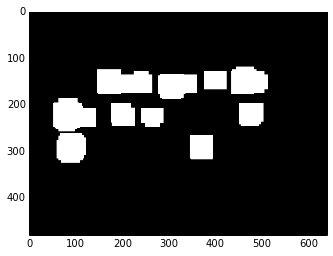

In [77]:
im = imread('../data/ex2/preMap/block100.png')
bb = image2bb(im, 128)
imbb = drawbb(im, bb, [0, 255, 0], 3)

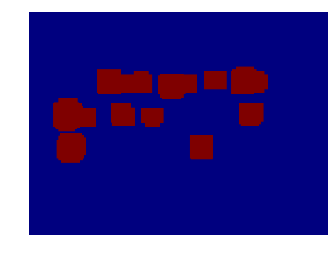

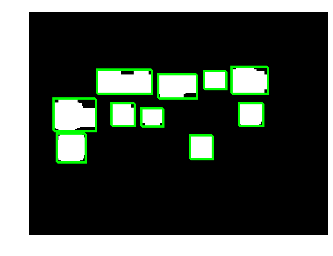

[[119, 433, 177, 511],
 [125, 145, 177, 263],
 [128, 374, 167, 422],
 [135, 276, 187, 359],
 [187, 52, 257, 143],
 [197, 176, 246, 226],
 [197, 449, 246, 501],
 [208, 240, 247, 287],
 [262, 59, 324, 121],
 [266, 344, 317, 393]]

In [79]:
plt.axis('off')
plt.imshow(im)
plt.show()

plt.axis('off')
plt.imshow(imbb)
plt.show()
bb

In [74]:
def image2bb(img, thre):
    ''' _image2bb(self, label)

    convert image hot map into bb text strings
    image: prediction image hotmap
    thre: threshold to binarize the hotmap
    Return: string, contains boundingbox coordinates'''
    from skimage.measure import label as skimage_label
    lbimg = skimage_label(numpy.uint8(img > thre), background = 0)
    bbox = []
    for l in xrange(lbimg.max()+1):
        x, y = numpy.where(lbimg == l)
        x0 = min(x)
        y0 = min(y)
        x1 = max(x)
        y1 = max(y)
        bb = [x0, y0, x1, y1]
        bbox.append(bb)
    return bbox

def drawbb(canvas, Coor, mycolor, linewidth):
    ''' drawbb(canvas, Coor, mycolor, linewidth)
    
    canvas: numpy array image on which to draw bounding box
    Coor: list of list, coordinates of corners of bounding box
    mycolor: color of bounding box
    linewidth: line width of bounding box '''
    
    from skimage.draw import line as skimage_line
    if len(canvas.shape) == 2:
        rgbimg = numpy.zeros((canvas.shape[0], canvas.shape[1], 3), dtype = numpy.uint8)
        rgbimg[:, :, 0] = canvas
        rgbimg[:, :, 1] = canvas
        rgbimg[:, :, 2] = canvas
        canvas = rgbimg
        plt.imshow(canvas)
        plt.show()
    
    for coor in Coor:
        x1 = coor[0]
        y1 = coor[1]
        x2 = coor[2]
        y2 = coor[3]
        line1 = skimage_line(x1, y1, x2, y1)
        line2 = skimage_line(x1, y1, x1, y2)
        line3 = skimage_line(x1, y2, x2, y2)
        line4 = skimage_line(x2, y1, x2, y2)
        canvas = setcolor(canvas, line1, mycolor, linewidth)
        canvas = setcolor(canvas, line2, mycolor, linewidth)
        canvas = setcolor(canvas, line3, mycolor, linewidth)
        canvas = setcolor(canvas, line4, mycolor, linewidth)
    return canvas

def setcolor(img, coor, color, line_width = 1):
    '''setcolor(img, coor, color, line_width = 1)
    
    set colors of given pixel
    img: img to set color
    coor: coordinates of pixels which to set colors
    color: the colors of the target pixels
    line_width: width of the neighborhood to set color '''
    
    oimg = img
    xcor, ycor = coor
    coor = map(lambda x, y: (x, y), xcor, ycor)
    
    if len(img.shape) == 2:
        rgbimg = numpy.empty((img.shape[0], img.shape[1], 3))
        rgbimg[:, :, 0] = img
        rgbimg[:, :, 1] = img
        rgbimg[:, :, 2] = img
        img = rgbimg

    if len(img.shape) == 3 and img.shape[2] == 3 and len(color) == 3:
        #print 'color image'
        for x, y in coor:
            for i, k in enumerate(color):
                if line_width == 1:
                    img[x, y, i] = k
                else:
                    for w in range(line_width):
                        xmax = min(x+w, img.shape[0]-1)
                        ymax = min(y+w, img.shape[1]-1)
                        xmin = max(0, x-w)
                        ymin = max(0, y-w)
                        img[xmax, ymax, i] = k
                        img[xmin, ymin, i] = k        
        return img   
    else:
        raise Exception('Unknown dimension size of color image')